In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from methods import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loads files as dataframes
data_ent_followup = create_df("f_Sections F,G,h - Ent.dta", "Analysis files/data/Followup/{0}")

data_edu_baseline = create_df("education.dta", "Analysis files/data/Baseline/{0}")

data_ent_baseline = create_df("Sections F,G,h - Ent.dta", "Analysis files/data/Baseline/{0}")

data_age_baseline = create_df("personal info.dta", "Analysis files/data/Baseline/{0}")

In [3]:
#Removes attrition from the baseline dataframes
updated_edu_baseline = remove_attrition(data_edu_baseline, data_ent_followup)
updated_ent_baseline = remove_attrition(data_ent_baseline, data_ent_followup)
updated_age_baseline = remove_attrition(data_age_baseline, data_ent_followup)

Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961


In [4]:
#Creates big array with the desired columns of edu_baseline, ent_baseline, and ent_followup.
#Contains the columns specified below.
#Corrects NaN values to zero.
ent_edu_master = updated_ent_baseline[['treatment_x', 'rescode', 'enterprise', 'soleent']].join(data_ent_followup[['f_enterprise', 'f_soleent']])
ent_edu_master = ent_edu_master.join(updated_edu_baseline[["edulow", "eduvoc", "eduhigh"]])
ent_edu_master = ent_edu_master.join(updated_age_baseline[["age"]])
ent_edu_master = ent_edu_master.fillna(0)

In [5]:
#Find number of participants in each age bin: 18-39, 40-69
ent_edu_age2 = ent_edu_master.copy()

ent_edu_age2['age'] = ent_edu_age2['age'].apply(lambda x: x//10)
ent_edu_age2.loc[ent_edu_age2.age==1, 'age'] = 3
ent_edu_age2.loc[ent_edu_age2.age==6, 'age'] = 4
ent_edu_age2.loc[ent_edu_age2.age==2, 'age'] = 3
ent_edu_age2.loc[ent_edu_age2.age==5, 'age'] = 4

for i in range(10):
    print(i,')', len(ent_edu_age2.loc[(ent_edu_age2['age'] == i)&(ent_edu_age2['treatment_x']==2), :]))
    
ageBins = ['18-39', '40-69']

for i in range(3, 5):
    ent_edu_age2.loc[ent_edu_age2['age']==i, 'agebin'] = ageBins[i-3]

0 ) 0
1 ) 0
2 ) 0
3 ) 169
4 ) 182
5 ) 0
6 ) 0
7 ) 0
8 ) 0
9 ) 0


In [6]:
#control: treatment_x = 0
#individual: treatment_x = 1
#group: treatment_x = 2

In [7]:
#Copy of ent_edu_master for 'conversion rate' analysis, adds edu column, 
ent_edu_age2['edu'] = ent_edu_age2['edulow']*2 + ent_edu_age2['eduvoc']*2 + ent_edu_age2['eduhigh'] * 3
eduBins = ['edulow & voc ', 'eduhigh']
for i in range(2, 4):
    ent_edu_age2.loc[ent_edu_age2['edu']==i, 'edubin'] = eduBins[i-2]

treatment = 2
POSITIVE = True
ent_edu_age2

,treatment_x,rescode,enterprise,soleent,f_enterprise,f_soleent,edulow,eduvoc,eduhigh,age,agebin,edu,edubin
0,0.0,11101,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-69,3.0,eduhigh
1,0.0,11102,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-69,3.0,eduhigh
2,0.0,11103,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-69,3.0,eduhigh
3,0.0,11201,0,0.0,1,0.0,0.0,0.0,1.0,3.0,18-39,3.0,eduhigh
4,0.0,11203,1,1.0,1,0.0,1.0,0.0,0.0,3.0,18-39,2.0,edulow & voc
5,0.0,11301,1,0.0,1,0.0,0.0,1.0,0.0,4.0,40-69,2.0,edulow & voc
6,0.0,11302,1,0.0,1,0.0,0.0,1.0,0.0,4.0,40-69,2.0,edulow & voc
7,0.0,11304,1,1.0,0,0.0,1.0,0.0,0.0,3.0,18-39,2.0,edulow & voc
8,0.0,11402,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-69,3.0,eduhigh
9,0.0,11403,1,0.0,1,0.0,0.0,0.0,1.0,4.0,40-69,3.0,eduhigh


In [8]:
#CONTROL: Create control ageGroup and eduGroup to use for subtraction
if POSITIVE:
    ageGroup2Controlled = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    ageGroup2Controlled = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 
    
if POSITIVE:
    eduGroupControlled = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduGroupControlled = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

In [9]:
#CONTROL:Conversion rate chart with binning by age only 
for i in range(3, 5):
        ageGroup2Controlled = crTableAge(i, POSITIVE, 0, ent_edu_age2, ageGroup2Controlled)
cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == 0)])
ageGroup2Controlled

,age,agebins,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent,agebin
0,3,NaN,0.345679,28.0,123,81,0.658537,18-39
1,4,NaN,0.197368,15.0,137,76,0.554745,40-69


In [10]:
#CONTROL: Conversion rate chart with binning by edu only 
# i, POSITIVE, treatment, ent_edu_conv, ageGroup4
for i in range(2, 4):
        eduGroupControlled = crTableEdu(i, POSITIVE, 0, ent_edu_age2, eduGroupControlled)
cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == 0)])
eduGroupControlled

,edu,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2.0,0.238095,15.0,95.0,63.0,0.663158
1,3.0,0.297872,28.0,165.0,94.0,0.569697


In [11]:
#creates new data frame for 'conversion rate' analysis by separate age and edu binning
if POSITIVE:
    ageGroup2 = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    ageGroup2 = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 
    
if POSITIVE:
    eduGroup = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduGroup = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

In [12]:
#Conversion rate chart with binning by age only 
for i in range(3, 5):
        ageGroup2 = crTableAge(i, POSITIVE, treatment, ent_edu_age2, ageGroup2)
cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == treatment)])
print("Conversion rate for age group 10 (aggregate) is:", cr)
ageGroup2

Conversion rate for age group 10 (aggregate) is: 0.33183856502242154


,age,agebins,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent,agebin
0,3,NaN,0.362069,42.0,169,116,0.686391,18-39
1,4,NaN,0.299065,32.0,182,107,0.587912,40-69


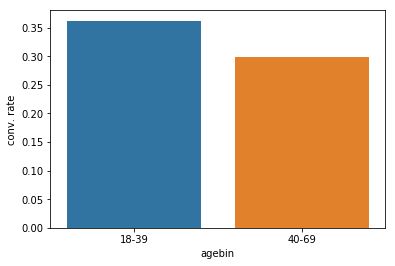

In [13]:
#age graph (not controlled)
ax = sns.barplot(x="agebin", y="conv. rate", data=ageGroup2)

In [14]:
#Conversion rate chart with binning by edu only 
# i, POSITIVE, treatment, ent_edu_conv, ageGroup4
for i in range(2, 4):
        eduGroup = crTableEdu(i, POSITIVE, treatment, ent_edu_age2, eduGroup)
cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == treatment)])
print("Conversion rate for edu level 4 (aggregate) is:", cr)
eduGroup

Conversion rate for edu level 4 (aggregate) is: 0.33183856502242154


,edu,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2.0,0.485294,33.0,110.0,68.0,0.618182
1,3.0,0.264516,41.0,241.0,155.0,0.643154


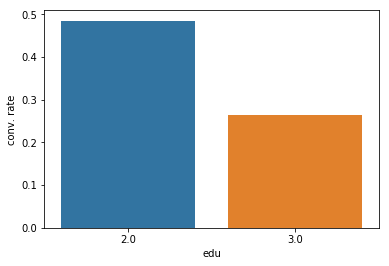

In [15]:
#edu graph (not controlled)
ax = sns.barplot(x="edu", y="conv. rate", data=eduGroup)

,age,agebins,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent,agebin
0,3,NaN,0.016390,28.0,123,81,0.658537,18-39
1,4,NaN,0.101697,15.0,137,76,0.554745,40-69


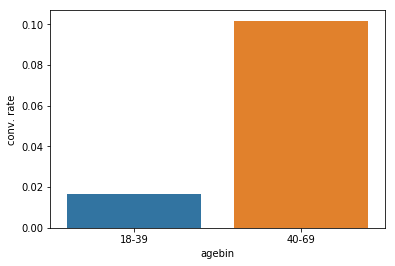

In [16]:
#CONTROLLED: age graph
ageGroup2Controlled['conv. rate'] = ageGroup2['conv. rate'] - ageGroup2Controlled['conv. rate']
ax = sns.barplot(x="agebin", y="conv. rate", data=ageGroup2Controlled)
ageGroup2Controlled

,edu,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2.0,0.247199,15.0,95.0,63.0,0.663158
1,3.0,-0.033356,28.0,165.0,94.0,0.569697


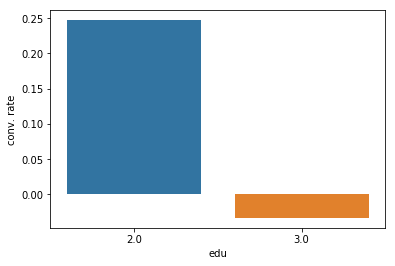

In [17]:
#CONTROLLED: edu graph
eduGroupControlled['conv. rate'] = eduGroup['conv. rate'] - eduGroupControlled['conv. rate']
ax = sns.barplot(x="edu", y="conv. rate", data=eduGroupControlled)
eduGroupControlled

In [18]:
#Conversion rate chart with binning by age AND edu
if POSITIVE:
    eduANDageGroup = pd.DataFrame(columns = ['edu', 'edubin', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduANDageGroup = pd.DataFrame(columns = ['edu', 'edubin', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

for i in range(3, 5):
    for j in range(2, 4):
        ap = len(ent_edu_age2[(ent_edu_age2.treatment_x == treatment)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j)])
        agebin = ent_edu_age2[(ent_edu_age2['age'] == i)].iloc[0]['agebin']
        edubin = ent_edu_age2[(ent_edu_age2['edu'] == j)].iloc[0]['edubin']
        if ap != 0:
            cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == treatment)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j)])
            if POSITIVE: #set baseline sample size to be number of people without soleent at baseline
                blSS = len(ent_edu_age2[(ent_edu_age2.treatment_x == treatment)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j) & (ent_edu_age2.soleent == 0)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroup = eduANDageGroup.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/o BL soleent':blSS, 'fraction w/o BL soleent' : blSS/ap}, ignore_index=True)
            else: #set baseline sample size to be number of people with soleent at baseline
                blSS = len(ent_edu_age2[(ent_edu_age2.treatment_x == treatment)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j) & (ent_edu_age2.soleent == 1)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroup = eduANDageGroup.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/ BL soleent':blSS, 'fraction w/ BL soleent' : blSS/ap}, ignore_index=True)
        else:
            eduANDageGroup = eduANDageGroup.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': 0, 'mean' : 0, 'all people' : 0, 'people w/o BL soleent':0, 'fraction w/o BL soleent' : 0}, ignore_index=True)

eduANDageGroup

,edu,edubin,agebin,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2,edulow & voc,18-39,0.600000,18.0,43,30,0.697674
1,3,eduhigh,18-39,0.279070,24.0,126,86,0.682540
2,2,edulow & voc,40-69,0.394737,15.0,67,38,0.567164
3,3,eduhigh,40-69,0.246377,17.0,115,69,0.600000


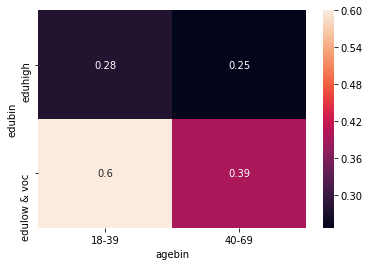

In [19]:
eduANDageGroupGraphing = eduANDageGroup.pivot("edubin", "agebin", "conv. rate")
ax = sns.heatmap(eduANDageGroupGraphing, annot=True)

In [20]:
#CONTROL
#Conversion rate chart with binning by age AND edu
if POSITIVE:
    eduANDageGroupControlled = pd.DataFrame(columns = ['edu', 'edubin', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduANDageGroupControlled = pd.DataFrame(columns = ['edu', 'edubin', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

for i in range(3, 5):
    for j in range(2, 4):
        ap = len(ent_edu_age2[(ent_edu_age2.treatment_x == 0)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j)])
        agebin = ent_edu_age2[(ent_edu_age2['age'] == i)].iloc[0]['agebin']
        edubin = ent_edu_age2[(ent_edu_age2['edu'] == j)].iloc[0]['edubin']
        if ap != 0:
            cr = conversionRate(POSITIVE, ent_edu_age2[(ent_edu_age2.treatment_x == 0)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j)])
            if POSITIVE: #set baseline sample size to be number of people without soleent at baseline
                blSS = len(ent_edu_age2[(ent_edu_age2.treatment_x == 0)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j) & (ent_edu_age2.soleent == 0)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroupControlled = eduANDageGroupControlled.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/o BL soleent':blSS, 'fraction w/o BL soleent' : blSS/ap}, ignore_index=True)
            else: #set baseline sample size to be number of people with soleent at baseline
                blSS = len(ent_edu_age2[(ent_edu_age2.treatment_x == 0)&(ent_edu_age2.age == i) & (ent_edu_age2.edu == j) & (ent_edu_age2.soleent == 1)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroupControlled = eduANDageGroupControlled.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/ BL soleent':blSS, 'fraction w/ BL soleent' : blSS/ap}, ignore_index=True)
        else:
            eduANDageGroupControlled = eduANDageGroupControlled.append({'edu': j, 'edubin': edubin, 'agebin': agebin, 'conv. rate': 0, 'mean' : 0, 'all people' : 0, 'people w/o BL soleent':0, 'fraction w/o BL soleent' : 0}, ignore_index=True)

eduANDageGroupControlled

,edu,edubin,agebin,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2,edulow & voc,18-39,0.285714,6.0,31,21,0.677419
1,3,eduhigh,18-39,0.366667,22.0,92,60,0.652174
2,2,edulow & voc,40-69,0.214286,9.0,64,42,0.656250
3,3,eduhigh,40-69,0.176471,6.0,73,34,0.465753


,edu,edubin,agebin,conv. rate,mean,all people,people w/o BL soleent,fraction w/o BL soleent
0,2,edulow & voc,18-39,0.314286,6.0,31,21,0.677419
1,3,eduhigh,18-39,-0.087597,22.0,92,60,0.652174
2,2,edulow & voc,40-69,0.180451,9.0,64,42,0.656250
3,3,eduhigh,40-69,0.069906,6.0,73,34,0.465753


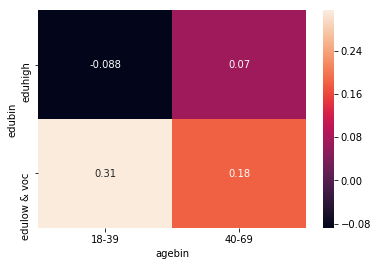

In [21]:
eduANDageGroupControlled['conv. rate'] = eduANDageGroup['conv. rate'] - eduANDageGroupControlled['conv. rate']
eduANDageGroupControlledGraphing = eduANDageGroupControlled.pivot("edubin", "agebin", "conv. rate")
ax = sns.heatmap(eduANDageGroupControlledGraphing, annot=True)
eduANDageGroupControlled